### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 進行「量化技術分析系統」之ＡＩ方面調整，利用[ChatGPT](https://chatgpt.com/)來將GPT-4o的Prompt[轉換](https://chatgpt.com/share/69564074-a4e4-800c-afd0-d6fd527b699f)為[GPT-5.2](https://openai.com/zh-Hant/index/introducing-gpt-5-2/)的Prompt：
  > system_prompt = "你是一位具備專業技術分析能力的股市分析師，請依據使用者提供的圖表進行全面技術分析並給出專業評價。圖表說明如下：主圖為K線圖，紅K代表收盤價高於開盤價、黑K代表收盤價低於開盤價，並包含四條移動平均線：棕色線為5日移動平均線（短期趨勢）、天藍色線為10日移動平均線（短期趨勢）、紫色線為20日移動平均線（中期趨勢）、橙色線為60日移動平均線（中期趨勢）；子圖一為成交量（Volume），以柱狀體呈現，顏色與K線同步反映多空；子圖二為KD指標，紅線為K線（slowk）、藍線為D線（slowd），綠色虛線區分超買區（80以上）與超賣區（20以下）；子圖三為MACD指標，紅線為DIF線（macd）、藍線為MACD線（macdsignal）、灰色柱狀體為OSC（macdhist）。請你綜合價格走勢、成交量變化、KD與MACD指標，依序以固定段落與標題輸出：價格趨勢、價量關係、支撐與壓力、KD指標解讀、MACD指標解讀、綜合評價，其中支撐與壓力請盡可能以具體價格或點數區間呈現。回覆需使用通順、專業、客觀的繁體中文敘述句，不使用聊天語氣或條列，不得提及任何參考資料、資料來源或推理過程，用詞需遵守回調改為回檔、止盈改為停利、止損改為停損。"
  >   
  > user_question = "請依據下圖（圖中價格單位為：{}）進行技術分析，內容需包含價格趨勢（上漲／盤整／下跌）、價量關係、支撐與壓力價格或點位、KD指標解讀與MACD指標解讀，並綜合上述分析給出評價；分析時可參考最近五個交易日的價格與移動平均線資料：{}、KD指標資料：{}、MACD指標資料：{}，但回覆中不得提及任何參考資料或數據來源，請直接輸出完整技術分析結果。".format(self._price_volume_unit_str, ref_price_sma_json, ref_kd_json, ref_macd_json)  
* 【平日夜間班溫馨提醒】  
   今天是元旦休假，怕同學忘記了，提醒明天就是平日夜間班正式上課日，還沒有報名的同學記得加緊腳步。  
   本季應該是歷年開課以來CP值最高的：新編講義×加碼課程×新增進階課程，明天晚上7點線上見。  
   本季與往年第一季課程的差異：  
   加碼課程1：單一K線與多根K線，提供教學影片和電子講義，讓同學自習。  
   加碼課程2：1月底會有一堂彙整的互動線上應用課，會安排在星期三，也會提供複習影片。  
   加碼課程3：3月中旬，成為專職投資人前的準備。  
   新版課程：K線圖與道氏理論、KD、MCAD、均線、趨勢線、形態學，為2026新版教案。  
   新增課程：趨勢線進階版、形態學進階版(首次在平日夜間班開課)  
   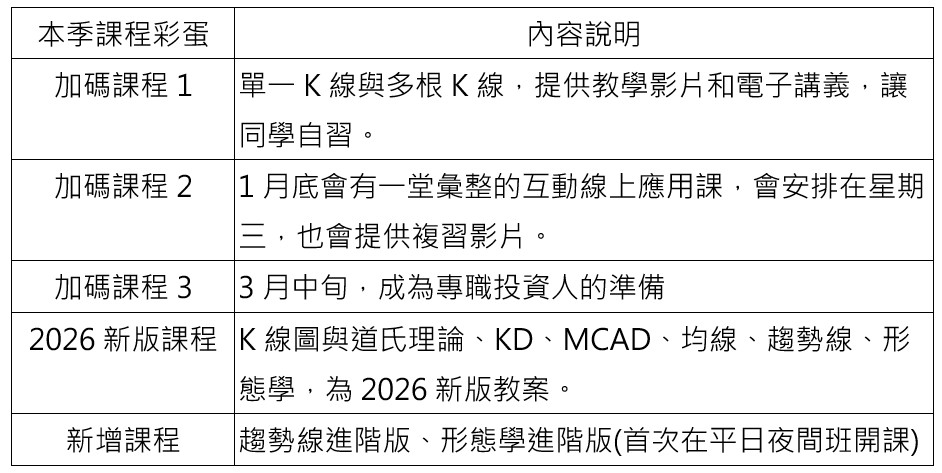  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 建立「解盤」物件    

In [3]:
analysis = mysys.StockAnalysis(debug=True)

* 測試GPT-5.2模型

ＤＥＢＵＧ ： 日Ｋ開始日期 ＝ 2024-01-01 ，日Ｋ結束日期 ＝ 2026-01-01 ， 週Ｋ開始日期 ＝ 2024-01-01 ， 週Ｋ結束日期 ＝ 2025-12-22
ＤＥＢＵＧ ： 轉折點引數列表 ＝ [{'mode': 'close', 'order': 10, 'smoothing': 3}, {'mode': 'open_close', 'order': 5}]
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 18） 
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 36） 
ＤＥＢＵＧ ： 此轉折高點與底部型態之前高點間不足１５％空間，結束底部型態確認。此轉折點 ＝ 
Date     2025-05-16 00:00:00
Price               21843.69
Type                      HI
Name: 202, dtype: object
ＤＥＢＵＧ ： 底部型態開始索引 ＝ 176 （日期 ＝ 2025-04-09 ） ， 底部型態結束索引 ＝ 187 （日期 ＝ 2025-04-24 ）
ＤＥＢＵＧ ： 趨勢線開始索引 ＝ 0（價格資料開始索引 ＝ 176），趨勢線結束索引 ＝ 11（價格資料結束索引 ＝ 187）
ＤＥＢＵＧ ： 底部型態突破確認範圍 ： 187 ～ 207
ＤＥＢＵＧ ： 確認底部型態突破，收盤價超過頸線３％。價格索引 ＝ 192 ， 日期 ＝ 2025-05-02 ， 突破時頸線價格 ＝ 19758.63元 
ＤＥＢＵＧ ： 底部最低價格 ＝ 17391.76元 ； 估算目標價 ＝ 22257.56元
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 23 ，結束索引 ＝ 36） 
ＤＥＢＵＧ ： ★ 已達底部型態之目標價 ： 日期 ＝ 2025-06-10 （索引 ＝ 218）
ＤＥＢＵＧ ： 轉折點引數列表 ＝ [{'mode': 'close', 'order': 10, 'smoothing': 3}, {'mode': 'close', 'order': 10, 'smoothing': 5}, {'mode': 'open_close', 'order': 10}, {'mode': 'open_clo

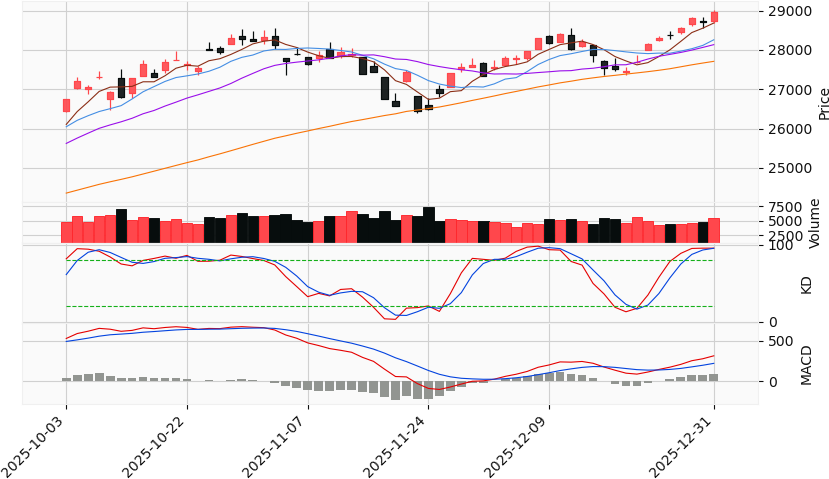

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-24 , 2025-12-30 十字線 : 2025-12-24 , 2025-12-30 孕育線／懷抱線 : 2025-12-30"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 5484.25億元 ，十日均量 ＝ 4860.07億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-26結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-19黃金交叉。並且2025-12-31於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。
整體評價,價格趨勢 整體走勢維持明顯上漲格局，近期高點持續墊高並逼近整數關卡，短線雖出現單日回檔但隨即收復並再創波段新高，顯示多方控盤力道仍強。均線結構呈現多頭排列，短期均線上彎且與中期均線維持正向乖離，代表趨勢延續性佳；惟短線漲幅偏大，後續較可能以高檔震盪或回檔方式消化乖離，而非立即反轉。 價量關係 成交量在上漲過程中同步放大，且近期放量推升至相對高檔，屬於價漲量增的偏多型態，反映追價與承接意願提升，有利於趨勢延伸。不過在高檔放量的同時也意味短線籌碼換手加速，若後續出現「價續漲但量縮」或「放量不漲」的情況，將提高高檔震盪與回檔機率，需留意量能是否能維持在相對活絡水準。 支撐與壓力 上方壓力以整數關卡與近期高點區為主，約落在29000點附近至29010點一帶，屬於短線容易出現獲利了結的區域；若能帶量有效突破並站穩，將有利於延伸上行空間。下方支撐先看短期均線匯聚區，約28680點至28550點附近，屬於短線回檔的第一道防線；若回檔加深，則可觀察前波整理與回測區約28370點至28280點一帶，為次要支撐區。再往下則為中期均線支撐帶，約28130點至28260點附近，若跌破將使短線轉為高檔整理甚至擴大回檔。 KD指標解讀 KD長時間位於80以上的超買區，且K、D值同步走高並貼近高檔，顯示多方動能強勁但也代表短線過熱。由於指標已處高檔鈍化狀態，短線即使續漲也可能伴隨震盪加劇；一旦出現K值下彎並跌破D值，將是高檔轉弱的較明確訊號，屆時回檔幅度可能擴大至短期均線支撐帶測試。 MACD指標解讀 MACD維持多方結構，DIF位於訊號線之上且兩者開口擴大，柱狀體同步增長，代表中短期趨勢動能仍在增強，偏多格局未被破壞。惟在連續走強後，若後續柱狀體由增轉減、DIF走平甚至向下靠近訊號線，將意味動能降溫，走勢可能由趨勢上漲轉為高檔盤整或回檔整理。 綜合評價 目前屬於趨勢偏多、動能偏強的上漲段，均線多頭排列配合價量齊揚，短中期仍以偏多看待；但KD高檔鈍化與短線乖離偏大，顯示追價風險上升，較合理的節奏將是高檔震盪或回檔後再攻。操作上宜以「守支撐、看量能」為核心，若能在28680點至28550點區間獲得有效支撐且量能不失速，偏多架構可望延續；反之若跌破並擴量走弱，則需提高風險控管，避免高檔回檔擴大。


In [4]:
stock_analysis(analysis,'TAIEX')

ＤＥＢＵＧ ： 日Ｋ開始日期 ＝ 2024-01-01 ，日Ｋ結束日期 ＝ 2026-01-01 ， 週Ｋ開始日期 ＝ 2024-01-01 ， 週Ｋ結束日期 ＝ 2025-12-22
ＤＥＢＵＧ ： 轉折點引數列表 ＝ [{'mode': 'close', 'order': 10, 'smoothing': 3}, {'mode': 'open_close', 'order': 5}]
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 15） 
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 34） 
ＤＥＢＵＧ ： 此轉折高點與底部型態之前高點間不足１５％空間，結束底部型態確認。此轉折點 ＝ 
Date     2025-05-15 00:00:00
Price                 231.51
Type                      HI
Name: 201, dtype: object
ＤＥＢＵＧ ： 底部型態開始索引 ＝ 176 （日期 ＝ 2025-04-09 ） ， 底部型態結束索引 ＝ 187 （日期 ＝ 2025-04-24 ）
ＤＥＢＵＧ ： 趨勢線開始索引 ＝ 0（價格資料開始索引 ＝ 176），趨勢線結束索引 ＝ 11（價格資料結束索引 ＝ 187）
ＤＥＢＵＧ ： 底部型態突破確認範圍 ： 187 ～ 207
ＤＥＢＵＧ ： 確認底部型態突破，收盤價超過頸線３％。價格索引 ＝ 192 ， 日期 ＝ 2025-05-02 ， 突破時頸線價格 ＝ 216.44元 
ＤＥＢＵＧ ： 底部最低價格 ＝ 185.14元 ； 估算目標價 ＝ 247.79元
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 19 ，結束索引 ＝ 34） 
ＤＥＢＵＧ ： ★ 已達底部型態之目標價 ： 日期 ＝ 2025-08-18 （索引 ＝ 267）
ＤＥＢＵＧ ： 轉折點引數列表 ＝ [{'mode': 'close', 'order': 10, 'smoothing': 3}, {'mode': 'close', 'order': 10, 'smoothing': 5}, {'mode': 'open_close', 'order': 10}, {'mode': 'open_close', '

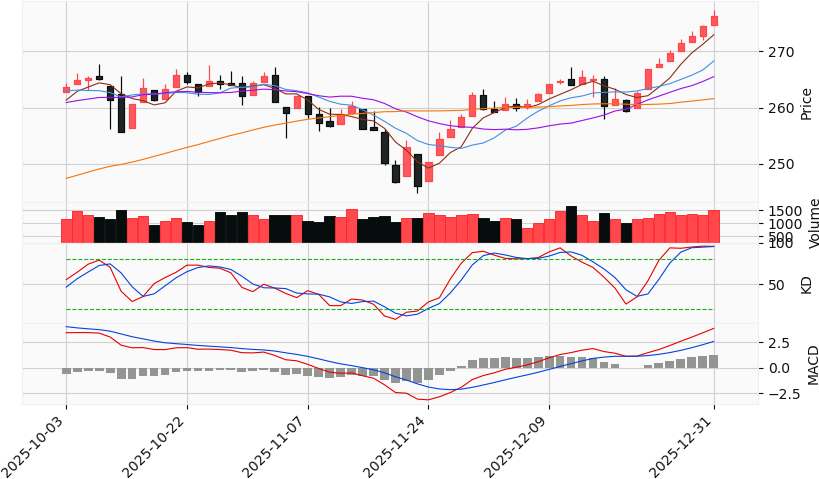

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1510.2億元 ，十日均量 ＝ 1281.31億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-22黃金交叉。並且2025-12-31於超買區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。並且2025-12-22該週在超買區。
整體評價,價格趨勢 整體走勢呈現明確上漲格局。近期K線連續收紅並逐步墊高，高點與低點同步上移，短線多方動能延續。均線結構呈現多頭排列，價格位於5日、10日、20日與60日均線之上，且短期均線上彎並與中期均線維持正向乖離，顯示趨勢偏多且仍在推進段。不過短線漲幅偏快，後續較容易出現回檔以消化乖離。 價量關係 量能整體維持在相對活絡水準，近期在價格走高過程中並未明顯失速，屬於價漲量穩偏多的型態；末端量能略有放大，有利於多方延續攻勢並推升突破。不過在連續上漲後若後續出現「價漲量縮」或「價平量增」的情況，需留意短線追價力道轉弱，容易轉為高檔震盪。 支撐與壓力 短線支撐先看5日均線附近約272～273點，若回檔不破，仍屬強勢整理；再下方10日均線約268～269點為次要支撐，亦是短線多空分水嶺。中期支撐落在20日均線約265點附近，若跌破則代表漲勢結構轉弱，回檔幅度可能擴大。上方壓力以近期高點區約276～277點為第一道關卡，若帶量突破並站穩，將有機會延伸至280點附近的整數關卡壓力帶。 KD指標解讀 KD長時間位於80以上的超買區，且K、D值維持高檔鈍化，反映多方趨勢強、短線動能仍在。惟高檔鈍化也代表追價風險上升，若後續出現K線下彎並跌破D線的死亡交叉，通常意味短線漲勢降溫，較可能進入高檔震盪或回檔整理；在此之前，KD偏向多方續強的解讀。 MACD指標解讀 DIF位於MACD之上且雙線同步上行，柱狀體維持正值並逐步放大，顯示中短期趨勢動能持續增強，屬於偏多的趨勢型訊號。若後續柱狀體由擴大轉為縮小，將代表動能開始趨緩，屆時即使價格不立即轉跌，也較容易先以回檔或盤整方式消化漲幅。 綜合評價 目前屬於趨勢明確的多頭上漲段，均線多頭排列、MACD動能增強，KD雖在超買區但仍呈高檔鈍化，整體偏多看待。操作上較有利於順勢偏多，但因短線乖離與超買訊號明顯，追高宜保守，較佳策略為等待回檔至272～273點附近或至少不破268～269點的支撐帶再評估承接；若跌破265點一帶，則需提高風險控管並留意趨勢轉弱的可能。


In [5]:
stock_analysis(analysis,'TPEx')

### 個股觀察  

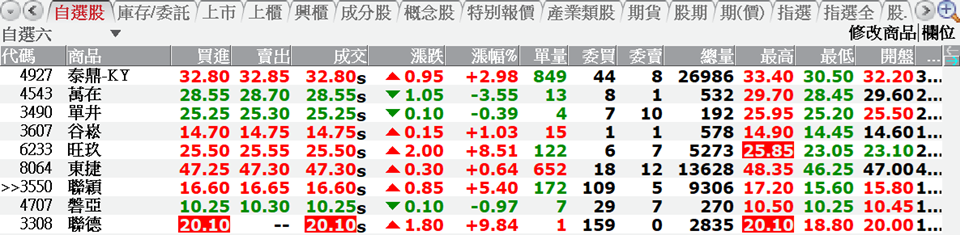  

* 昶昕(8438)  
  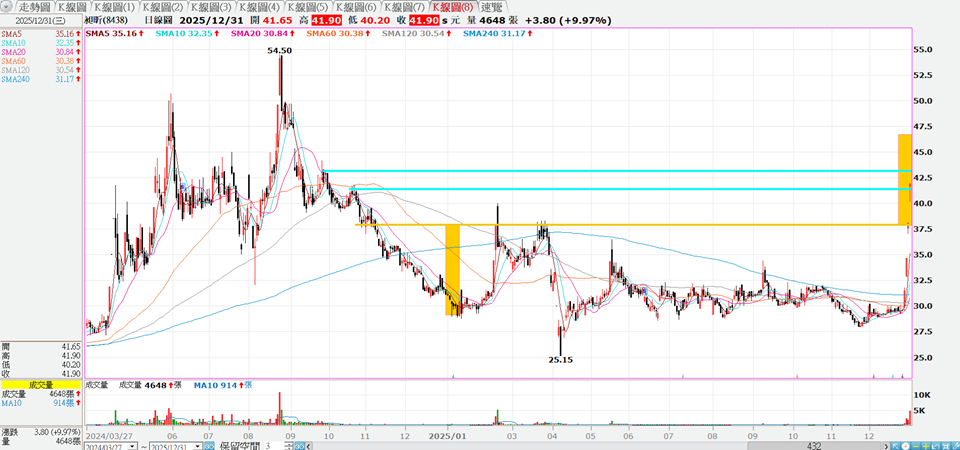  
* 千興(2025)  
  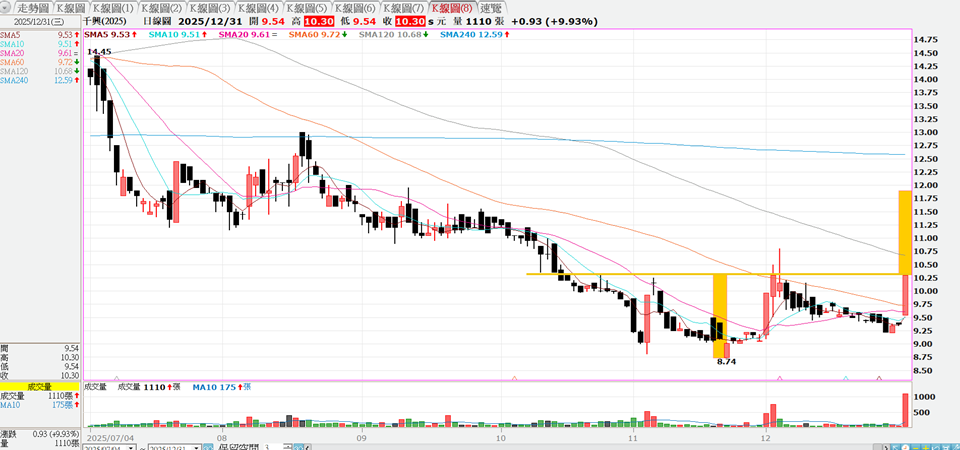    
* 聯德(3308)  
  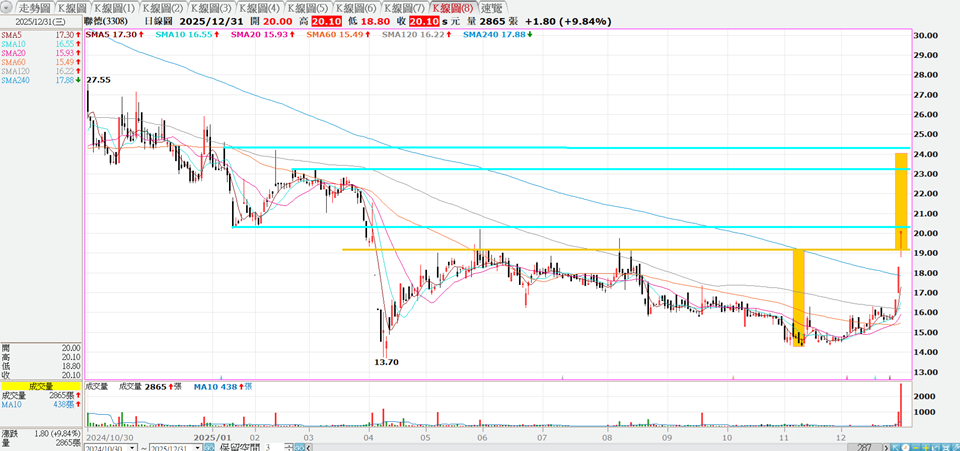  
* 旺玖(6233)  
  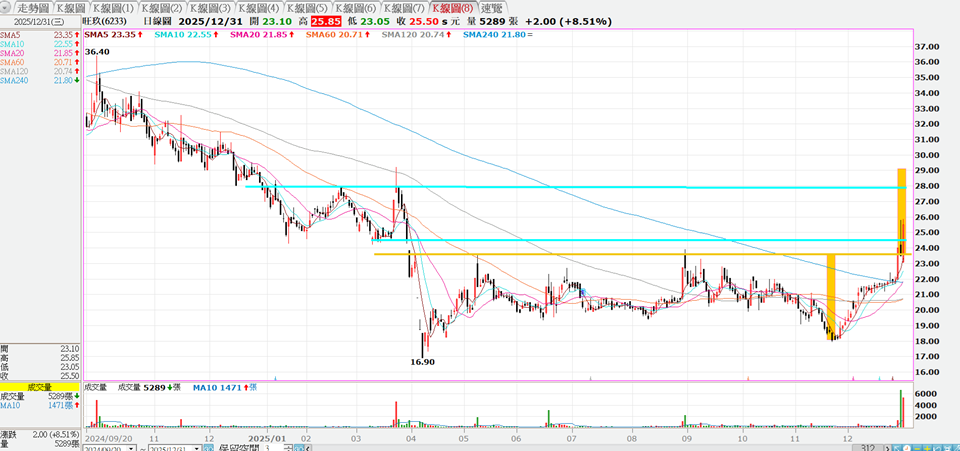  